<a href="https://colab.research.google.com/github/Ahad4200/ML-LABS/blob/main/ML_LAB_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

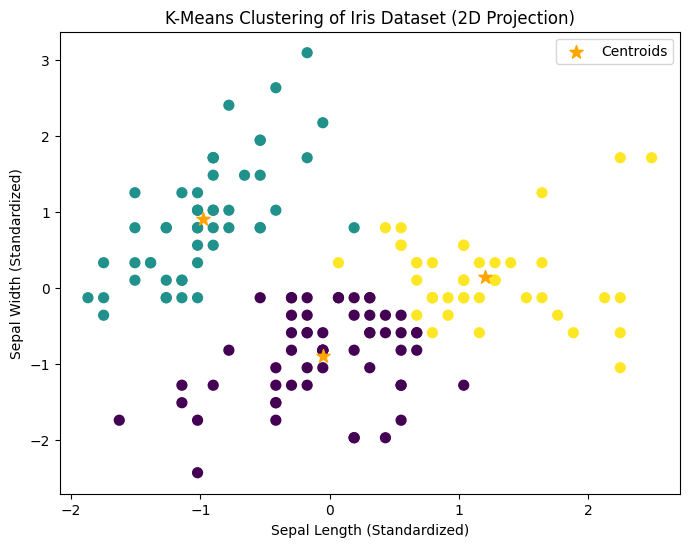

Final Centroids:
[[-0.04825457 -0.89526349]
 [-0.97822861  0.90390597]
 [ 1.20144049  0.13569118]]

Cluster Assignments:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 0 2 2 2 0 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Labels (3 classes of flowers)

# We will use only the first two features (sepal length, sepal width) for simplicity in visualization
X = X[:, :2]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: K-Means algorithm implementation
class KMeans:
    def __init__(self, k=3, max_iters=100, tolerance=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tolerance = tolerance

    def fit(self, X):
        # Step 2.1: Initialize centroids randomly
        np.random.seed(42)
        initial_centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]
        self.centroids = initial_centroids

        for i in range(self.max_iters):
            # Step 2.2: Assign clusters based on closest centroid
            labels = self._assign_clusters(X)

            # Step 2.3: Calculate new centroids
            new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(self.k)])

            # Step 2.4: Check if centroids have changed (convergence check)
            centroid_shift = np.linalg.norm(new_centroids - self.centroids)
            if centroid_shift < self.tolerance:
                break

            self.centroids = new_centroids

        self.labels = labels

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

# Step 3: Run K-Means with K=3 (for Iris dataset which has 3 classes)
kmeans = KMeans(k=3)
kmeans.fit(X_scaled)

# Step 4: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels, cmap='viridis', marker='o', s=50)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='orange', marker='*', s=100, label='Centroids')

# Add labels and title
plt.title('K-Means Clustering of Iris Dataset (2D Projection)')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.legend()
plt.show()

# Step 5: Print final centroids and cluster assignments
print("Final Centroids:")
print(kmeans.centroids)
print("\nCluster Assignments:")
print(kmeans.labels)